## CNN with Tensorflow|Keras for Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.The training and test data sets have 785 columns.The first column consists of the class labels (see above), and represents the article of clothing.The rest of 784 columns (1-785) contain the pixel-values of the associated image.

In [38]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import classification_report

# Import the backend
from keras import backend as K

In [3]:
train_df = pd.read_csv('/Users/saurabh/Documents/PythonData/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/Users/saurabh/Documents/PythonData/fashion-mnist_test.csv', sep = ',')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = np.array(train_df, dtype = 'float32')

In [7]:
test_data = np.array(test_df, dtype='float32')

In [9]:
train_data

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test = test_data[:,1:]/255

y_test = test_data[:,0]

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [18]:
# input image dimensions, from our data
img_rows, img_cols = 28, 28
num_classes = 10
epochs = 5

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [23]:
def get_categorical_accuracy_keras(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))

In [25]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [28]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(img_rows,img_cols)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_df)

Total number of sample images to plot:  40


Let's now plot the images.The labels are shown above each image.

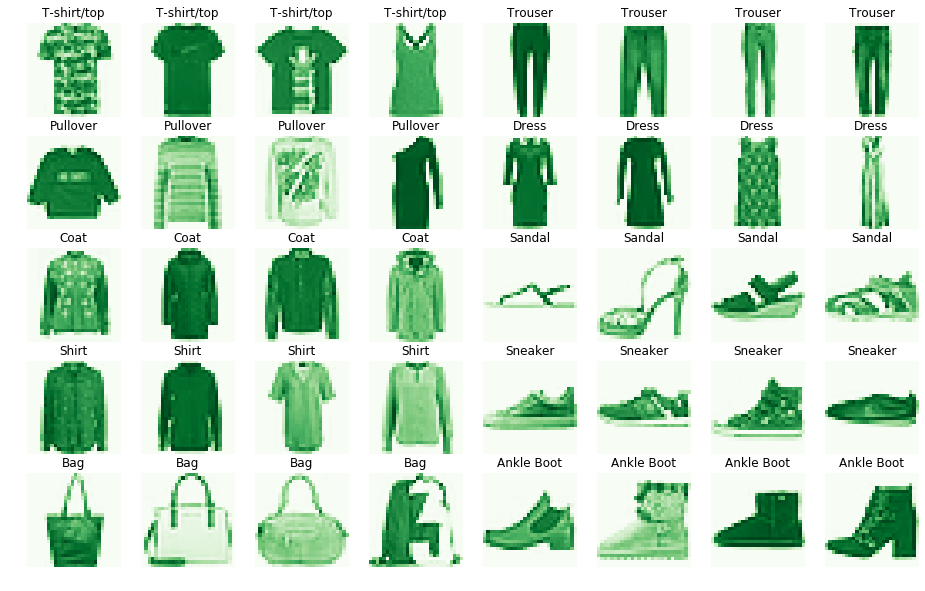

In [29]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

Let's plot now a selection of the test set images.

Total number of sample images to plot:  40


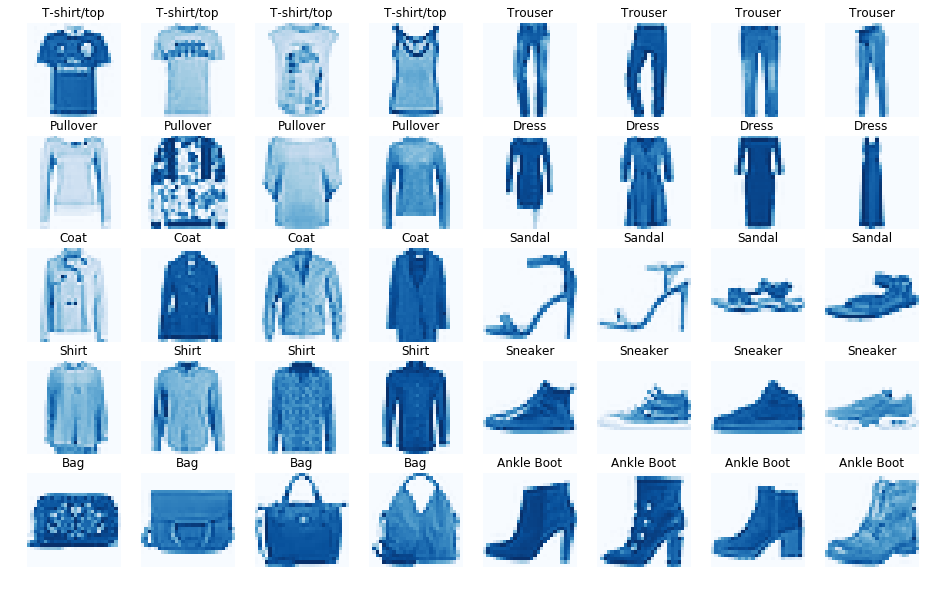

In [31]:
test_sample_images, test_sample_labels = sample_images_data(test_df)
plot_sample_images(test_sample_images,test_sample_labels)

In [33]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=[get_categorical_accuracy_keras])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.5673 - get_categorical_accuracy_keras: 0.8001 - val_loss: 0.3338 - val_get_categorical_accuracy_keras: 0.8821
Epoch 2/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.3595 - get_categorical_accuracy_keras: 0.8716 - val_loss: 0.2900 - val_get_categorical_accuracy_keras: 0.8939
Epoch 3/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.3122 - get_categorical_accuracy_keras: 0.8883 - val_loss: 0.2504 - val_get_categorical_accuracy_keras: 0.9081
Epoch 4/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2780 - get_categorical_accuracy_keras: 0.9007 - val_loss: 0.2404 - val_get_categorical_accuracy_keras: 0.9131
Epoch 5/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2575 - get_categorical_accuracy_keras: 0.9083 - val_loss: 0.2185 - val_get_categorical_accuracy_kera

Let's plot training and validation accuracy as well as loss.

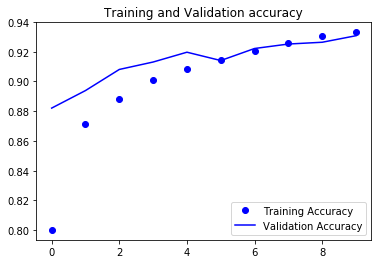

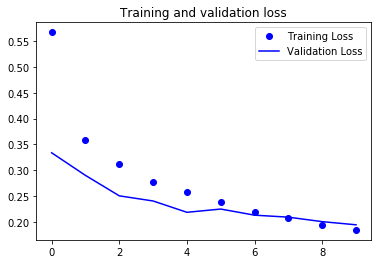

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['get_categorical_accuracy_keras']
val_accuracy = history.history['val_get_categorical_accuracy_keras']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.88      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.93      0.86      0.89      1000
     Class 3       0.91      0.95      0.93      1000
     Class 4       0.88      0.91      0.90      1000
     Class 5       1.00      0.98      0.99      1000
     Class 6       0.80      0.80      0.80      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.98      0.97      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



- It's apparent that classifier is underperforming for class 6 in terms of both precision and recall. 
- For class 2, classifier is slightly lacking precision 
- classifier is slightly lacking recall (i.e. missed) for class 4.

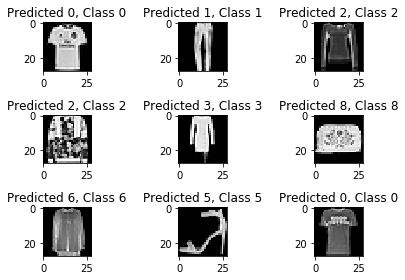

In [43]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

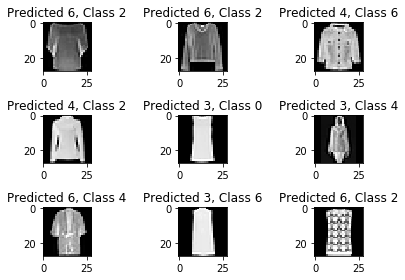

In [44]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

## Conclusions:

- After investigating the validation accuracy and loss, we understood that the model is overfitting.
We retrained the model with Dropout layers to the model to reduce overfitting.
- Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover).
- Sequential model with multiple convolution layers and 10 epochs for the training we got accuracy of 93%